# **Task 1**
**Classifying mnist dataset**

**Import the  mnist dataset and extracting the features(X) and the output label(y)**

In [46]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X, y = mnist["data"], mnist["target"]

**Input Examples**

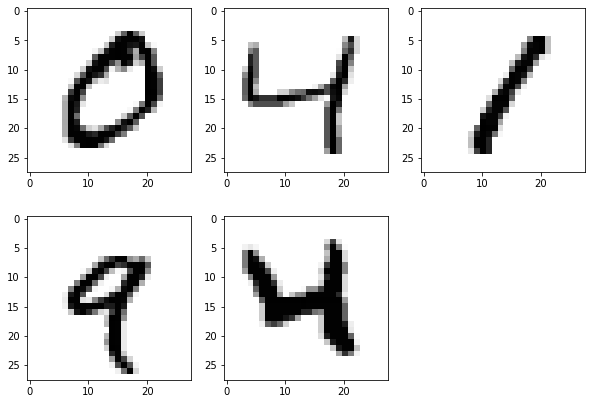

In [47]:
from matplotlib import pyplot as plt
import matplotlib as mplt
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(X[1].reshape(28,28),cmap=mplt.cm.binary)
fig.add_subplot(rows, columns, 2)
plt.imshow(X[2].reshape(28,28),cmap=plt.cm.binary)
fig.add_subplot(rows, columns, 3)
plt.imshow(X[3].reshape(28,28),cmap=plt.cm.binary)
fig.add_subplot(rows, columns, 4)
plt.imshow(X[4].reshape(28,28),cmap=plt.cm.binary)
fig.add_subplot(rows, columns, 5)
plt.imshow(X[20].reshape(28,28),cmap=plt.cm.binary)
plt.show()

**After getting the dataset ready , now , splitting it into 2 groups one for training and one for testing purposes**

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

**In order to do binary classification we should set the output label up to be only 2 classes. first class is True, means that this image is a 3. second class is false, means that this image is not 3. If we want to do a multiclass classification , we can ignore this step and pass the training data directly to the model** 

In [49]:
Y_train_3 = (Y_train == '3')
Y_test_3 = (Y_test == '3')
print(Y_train_3)

[False False False ... False False False]


**Importing SGDClassifier model and start training**

In [51]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train,Y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

**Get the predicted values for the test data to measure the performance and compute the confusion matrix**

In [52]:
predictions = model.predict(X_test)

**Calculating the confusion matrix and get the true positives(TP) , false positive(FP) , true negative (TN) and false negative(FN). In addition , Calucalting the Accuracy due to the equation below**

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test_3, predictions)

TN, FP, FN, TP = confusion_matrix(Y_test_3, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  1085
False Positive(FP) =  100
True Negative(TN)  =  12469
False Negative(FN) =  346
Accuracy of the binary classification = 0.968
